

 1. Put it in your portfolio repository, along with any images or interactive html visualization
 2. Add a markdown file to the `posts/02-climate` folder that contains a link to your portfolio.

# Coweeta Hydrologic Laboratory has been collecting climate data since it was established by the US Forest Service in 1934 
## The data available online through the Global Historical Climatology Network includes data from Denver Co & Coweeta which will be compared in this post.
* The Global Historical Climatology Network daily data integrates data from 30 different sources
* Observations are from a variety of meteorological organizations using land-based stations around the globe.
* Temperatures can be displayed in degrees Fahrenheit, but are collected in degrees Celsius
* There are three steps used to integrate data from different countries. Some locations contain historic data only and a quality assurance protocol is used although the data is not homogenous.

# Sources:
* Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - Daily (GHCN-Daily), Version 3. Coweeta Hydrologic Station USC00312102. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ Accessed: Nov. 18, 2024.
* Matthew J. Menne, Imke Durre, Russell S. Vose, Byron E. Gleason, and Tamara G. Houston, 2012: An Overview of the Global Historical Climatology Network-Daily Database. J. Atmos. Oceanic Technol., 29, 897-910. doi:10.1175/JTECH-D-11-00103.1.
* https://www.ncei.noaa.gov/pub/data/ghcn/daily/readme.txt


In [1]:
# Import required packages
import holoviews as hv
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

In [3]:
GHCnd_url = ('https://www.ncei.noaa.gov/access/services/data/v1'
'?dataset=daily-summaries'
'&dataTypes=TOBS,PRCP'
'&stations=USC00312102'
'&startDate=1942-12-01'
'&endDate=2024-09-30'
'&units=standard'
)
GHCnd_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TOBS,PRCP&stations=USC00312102&startDate=1942-12-01&endDate=2024-09-30&units=standard'

In [4]:
# Import data into Python from NCEI API
nc_climate_df = pd.read_csv(GHCnd_url)

nc_climate_df

,STATION,DATE,PRCP,TOBS
0,USC00312102,1942-12-01,0.93,95.0
1,USC00312102,1942-12-02,0.05,31.0
2,USC00312102,1942-12-03,0.44,41.0
3,USC00312102,1942-12-04,0.00,25.0
4,USC00312102,1942-12-05,0.63,37.0
...,...,...,...,...
29884,USC00312102,2024-09-26,3.48,63.0
29885,USC00312102,2024-09-27,5.61,70.0
29886,USC00312102,2024-09-28,0.60,61.0
29887,USC00312102,2024-09-29,0.27,61.0


In [6]:
nc_climate_df['temp_c'] = (nc_climate_df['TOBS'] - 32) * 5 / 9

nc_climate_df

,STATION,DATE,PRCP,TOBS,temp_c
0,USC00312102,1942-12-01,0.93,95.0,35.000000
1,USC00312102,1942-12-02,0.05,31.0,-0.555556
2,USC00312102,1942-12-03,0.44,41.0,5.000000
3,USC00312102,1942-12-04,0.00,25.0,-3.888889
4,USC00312102,1942-12-05,0.63,37.0,2.777778
...,...,...,...,...,...
29884,USC00312102,2024-09-26,3.48,63.0,17.222222
29885,USC00312102,2024-09-27,5.61,70.0,21.111111
29886,USC00312102,2024-09-28,0.60,61.0,16.111111
29887,USC00312102,2024-09-29,0.27,61.0,16.111111


<Axes: title={'center': 'Daily Temperature at Coweeta Hydrological Lab'}, xlabel='Date', ylabel='Temperature ($^\\circ$F)'>

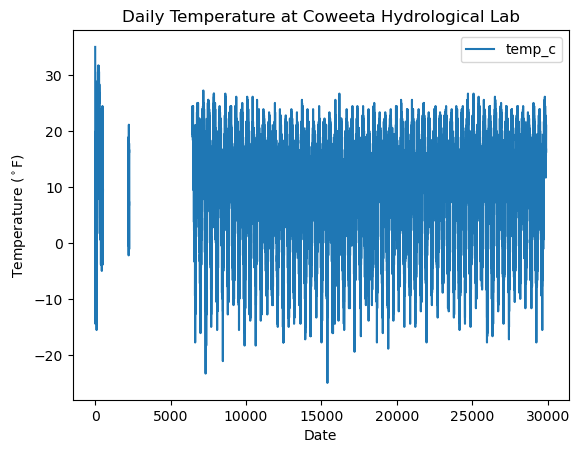

In [7]:
# Plot the data using .plot
nc_climate_df.plot(
    y='temp_c',
    title='Daily Temperature at Coweeta Hydrological Lab',
    xlabel='Date',
    ylabel='Temperature ($^\circ$F)')

In [8]:
# set index
nc_climate_df.set_index('DATE')

#consolidate data by year
nc_annual_climate_df = nc_climate_df.resample('YS').mean()
nc_annual_climate_df
type(nc_annual_climate_df)


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'